## Notebook for Data Annotation Visualization

A simple notebook for visualizing ground truth data with the annotated bounding booxes.

Change the image and annotation path as per your dataset directory path.

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import glob as glob

from xml.etree import ElementTree as et

In [2]:
image_paths = os.path.join(
    '..',
    'data', 
    'LiDAR',
    'archive',
    'data',
    'images',
    'val'
)
annotation_paths = os.path.join(
    '..',
    'data', 
    'LiDAR',
    'archive',
    'data',
    'labels',
    'val'
)

In [3]:
images = glob.glob(os.path.join(image_paths, '*'))
annotations = glob.glob(os.path.join(annotation_paths, '*'))

images.sort()
annotations.sort()

In [4]:
def read_annotations(xml_path):
    tree = et.parse(xml_path)
    root = tree.getroot()
    
    boxes = []

    # Get the height and width of the image.
    image_width = image.shape[1]
    image_height = image.shape[0]

    # Box coordinates for xml files are extracted and corrected for image size given.
    for member in root.findall('object'):
        class_name = member.find('name').text
        # xmin = left corner x-coordinates
        xmin = int(member.find('bndbox').find('xmin').text)
        # xmax = right corner x-coordinates
        xmax = int(member.find('bndbox').find('xmax').text)
        # ymin = left corner y-coordinates
        ymin = int(member.find('bndbox').find('ymin').text)
        # ymax = right corner y-coordinates
        ymax = int(member.find('bndbox').find('ymax').text)
        
        boxes.append([xmin, ymin, xmax, ymax, class_name])
    return boxes

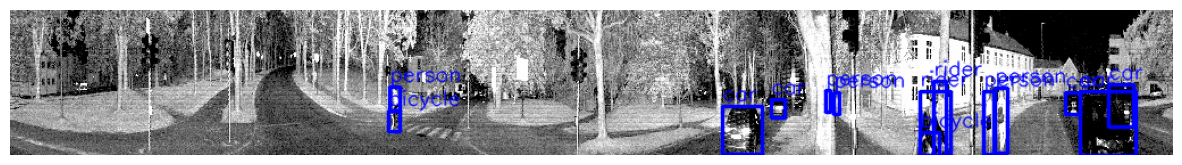

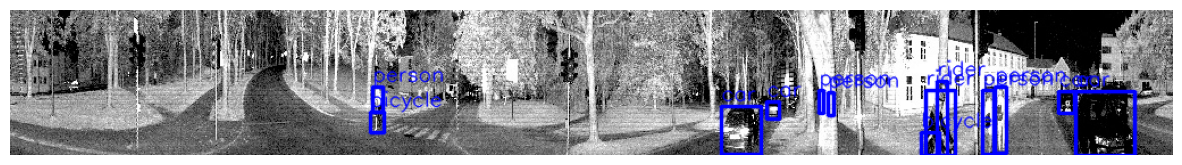

In [5]:
for i, image_path in enumerate(images):
    image = cv2.imread(image_path)
    xml_path = annotations[i]
    boxes = read_annotations(xml_path)
    
    for box in boxes:
        xmin = box[0]
        ymin = box[1]
        xmax = box[2]
        ymax = box[3]
        class_name = box[4]
        cv2.rectangle(
            image, 
            (int(xmin), int(ymin)),
            (int(xmax), int(ymax)),
            color=(255, 0, 0),
            thickness=2,
            lineType=cv2.LINE_AA
        )
        cv2.putText(
            image,
            text=class_name,
            org=(int(xmin), int(ymin-5)),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=0.6,
            color=(255, 0, 0),
            thickness=1,
            lineType=cv2.LINE_AA
        )
    plt.figure(figsize=(15, 5))
    plt.imshow(image[:, :, ::-1])
    plt.axis('off')
    plt.show()
    if i == 1:
        break